In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Training a neuron to compute Not function

Not function is also known as negation. Given a 0, it outputs 1. Given 1, it outputs 0. The following is the truth table.

|in | out|
|--------|
|0  | 1  |
|1  | 0  |

We will be training a single neuron to simulate this function. The neuron uses the sigmoid activation function.

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

Given a weight $w$ and $b$, the neuron calculates the output:-

$$ a = \sigma(wx+b)$$

Let us start with exploring the sigmoid function.

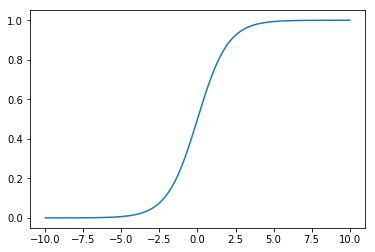

In [53]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

x = np.linspace(-10, 10, 1000)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

As can be seen, the sigmoid function maps an input from a domain $(-\infty, \infty)$ to a range of $(0, 1)$. 

Let us prepare the test data for the NOT function and initialize weights.

In [54]:
inp = [0, 1]
outp = [1, 0]

w = np.random.randn()
b = np.random.randn()

 Let us attempt to compute the NOT function using our initial weights.

In [55]:
error = 0
print "Initial weight: {0}; Initial bias: {1}".format(w, b)
for i in range(2):
    x = inp[i]
    e = outp[i]
    a = sigmoid(w*x + b)
    
    err = a-e
    
    print "Input = {0}; Output = {1}; Expected = {2}; Error = {3}".format(x, a, e, err)
    
    error += err**2
    
error /= 2

print "Cost = {0}".format(error)
    

Initial weight: 0.295524486334; Initial bias: 0.713112549953
Input = 0; Output = 0.671088554432; Expected = 1; Error = -0.328911445568
Input = 1; Output = 0.732753330346; Expected = 0; Error = 0.732753330346
Cost = 0.322555091079


As expected, random initial values do not produce the value we need. We now use gradient descent to adjust our weights and bias.

The cost is given by:-

$$Cost, C = \frac{1}{2n}\Sigma\lVert a-e \rVert^2$$

$$\frac{dC}{da} = \frac{1}{n}\Sigma(a-e)$$

The activation is given by:-

$$a = \sigma(z)$$

$$\frac{da}{dz} = a(1-a)$$

The sum, z is given by:-

$$z = w*x+b$$

$$\frac{\partial z}{\partial w} = x$$

$$\frac{\partial z}{\partial b} = 1$$

Using the differentiation chain rule, we get the final relation:-

$$\frac{\partial C}{\partial w} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * x$$

$$\frac{\partial C}{\partial b} = \frac{1}{n}\Sigma(a-e) * a * (1-a)$$

The gradients can be used to adjust the weight and bias:-

$$w \rightarrow w'-\frac{\partial C}{\partial w}$$
$$b \rightarrow b'-\frac{\partial C}{\partial b}$$

Let us use the formula to compute the gradients:-

In [56]:
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

del_w = 0
del_b = 0

for i in range(2):
    x = inp[i]
    e = outp[i]
    a = sigmoid(w*x + b)
    
    del_w += (a-e) * a * (1-a) * x
    del_b += (a-e) * a * (1-a)
    
del_w /= 2
del_b /= 2

print "Del_w = {0}; Del_b = {1}".format(del_w, del_b)
    
w -= (del_w)/2
b -= (del_b)/2

print "New weight = {0}; New bias = {1}".format(w,b)

Del_w = 0.0717460355116; Del_b = 0.0354459365379
New weight = 0.259651468578; New bias = 0.695389581684


Let us compute the new errors:-

In [57]:
error = 0
print "Current weight: {0}; Current bias: {1}".format(w, b)
for i in range(2):
    x = inp[i]
    e = outp[i]
    a = sigmoid(w*x + b)
    
    err = a-e
    
    print "Input = {0}; Output = {1}; Expected = {2}; Error = {3}".format(x, a, e, err)
    
    error += err**2
    
error /= 2

print "Cost = {0}".format(error)
    

Current weight: 0.259651468578; Current bias: 0.695389581684
Input = 0; Output = 0.667164791653; Expected = 1; Error = -0.332835208347
Input = 1; Output = 0.722127843038; Expected = 0; Error = 0.722127843038
Cost = 0.316123948803


As can be seen, the overall cost function is reducing. Let us try this 1000 more times.

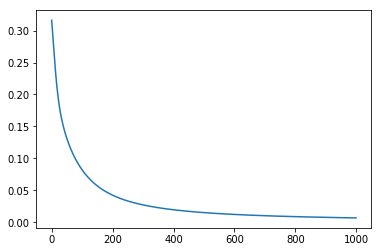

In [58]:
errors = []

for i in range(1000):
    del_w = 0
    del_b = 0
    error = 0

    for i in range(2):
        x = inp[i]
        e = outp[i]
        a = sigmoid(w*x + b)
        
        error += (a-e)**2
        del_w += (a-e) * a * (1-a) * x
        del_b += (a-e) * a * (1-a)
    
    del_w /= 2
    del_b /= 2

    w -= (del_w)/2
    b -= (del_b)/2
    
    errors.append(error/2)
    
plt.plot(errors)
plt.show()

Let us compute the error again at this point.

In [60]:
error = 0
print "Current weight: {0}; Current bias: {1}".format(w, b)
for i in range(2):
    x = inp[i]
    e = outp[i]
    a = sigmoid(w*x + b)
    
    err = a-e
    
    print "Input = {0}; Output = {1}; Expected = {2}; Error = {3}".format(x, a, e, err)
    
    error += err**2
    
error /= 2

print "Cost = {0}".format(error)
    

Current weight: -4.84359079118; Current bias: 2.30468477921
Input = 0; Output = 0.909264287888; Expected = 1; Error = -0.0907357121121
Input = 1; Output = 0.0731753338255; Expected = 0; Error = 0.0731753338255
Cost = 0.00679379946648


The output is getting closer to our desired value. Continuing on in this fashion would train the neuron to better simulate the NOT function.

Note that we never explicitly specified the weights and bias. We simply use the errors to nudge them in the right direction. We will be seeing these again in the future.